<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/Notebook/Helsinki/OSMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install libspatialindex-dev
!pip install osmnx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
import osmnx as ox

In [ ]:
# Specify the name that is used to seach for the data
place_name = "Kamppi, Helsinki, Finland"

In [ ]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

In [ ]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

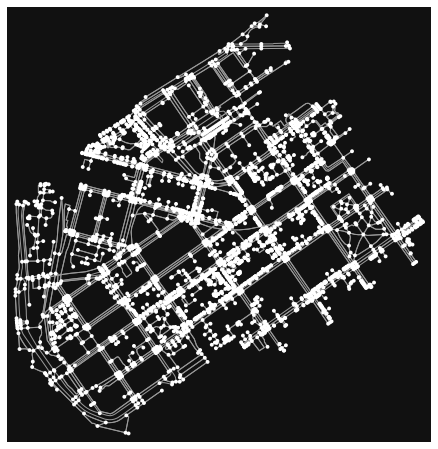

In [ ]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#test search at https://www.openstreetmap.org/ or at https://nominatim.openstreetmap.org/ to verify that the place name is valid

# Specify the name that is used to seach for the data
place_name = "Kamppi, Helsinki, Finland"

In [ ]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

In [ ]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

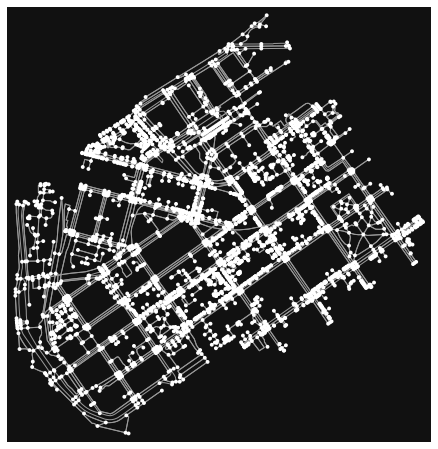

In [ ]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

In [ ]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
25216594,60.164794,24.921057,5,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163665,24.921028,4,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,4,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,3,NaN,NaN,POINT (24.92453 60.16111)
25238944,60.164631,24.921286,3,NaN,NaN,POINT (24.92129 60.16463)


In [ ]:
edges.head()

osmid  oneway lanes  ... bridge service  ref
u        v          key                           ...                    
25216594 1372425721 0     23717777    True     2  ...    NaN     NaN  NaN
         1372425714 0     23856784    True     2  ...    NaN     NaN  NaN
25238874 336192701  0     29977177    True     3  ...    NaN     NaN  NaN
         1519889266 0    122961573    True   NaN  ...    NaN     NaN  NaN
25238883 568147264  0     58077048    True     4  ...    NaN     NaN  NaN

[5 rows x 14 columns]

In [ ]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [ ]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Check data values
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...",60.172075,60.160469,24.943453,24.920642,257278968,relation,184714,60.168535,24.930494,"Kamppi, Southern major district, Helsinki, Hel...",boundary,administrative,0.760313


<AxesSubplot:>

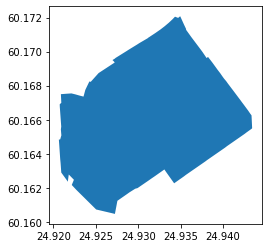

In [ ]:
area.plot()

In [ ]:
# List key-value pairs for tags
tags = {'building': True}

In [ ]:
buildings = ox.geometries_from_place(place_name, tags)

In [ ]:
len(buildings)

434

In [ ]:
buildings.head()

,unique_id,osmid,element_type,amenity,operator,geometry,source,access,addr:housenumber,addr:street,wheelchair,addr:unit,ref,created_by,name,addr:city,addr:postcode,height,opening_hours,fixme,note,addr:country,ele,phone,smoking,website,tourism,nodes,building,name:fi,name:ko,name:sv,start_date,url,wikidata,wikipedia,bar,email,fax,internet_access,...,short_name,was:building,was:guard:operator,building:min_level,cuisine,historic,inscription,tomb,addr:housename,shop,toilets:wheelchair,name:da,name:nn,wheelchair:description,denomination,religion,name:ru,official_name,last_pipe_renovation,contact:website,name:de,guard:operator,loc_name,name:no,alt_name:en,name:zh,drive_through,ice_cream,lippakioski,takeaway,outdoor_seating,toilets,addr:floor,covered,area,ways,type,brand,brand:wikidata,electrified
0,way/8035238,8035238,way,NaN,NaN,"POLYGON ((24.93563 60.17045, 24.93557 60.17054...",NaN,NaN,22-24,Mannerheimintie,NaN,NaN,NaN,NaN,Lasipalatsi,Helsinki,NaN,NaN,NaN,NaN,NaN,FI,NaN,NaN,NaN,NaN,NaN,"[60069605, 60069615, 60275530, 1036979252, 105...",public,Lasipalatsi,라시팔라치,Glaspalatset,1936,http://www.lasipalatsi.fi/,Q630304,fi:Lasipalatsi,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/8042297,8042297,way,NaN,NaN,"POLYGON ((24.92938 60.16795, 24.92933 60.16797...",NaN,NaN,2,Runeberginkatu,NaN,NaN,NaN,NaN,Radisson Blu Royal,Helsinki,00100,NaN,NaN,NaN,NaN,FI,NaN,+358 20 1234 701,outside,https://www.radissonblu.com/fi,hotel,"[1378950415, 1378950417, 1378950418, 319515866...",yes,NaN,NaN,NaN,after 1961,NaN,NaN,NaN,yes,info.royal.helsinki@radissonblu.com,+358 20 1234 702,wlan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/14797170,14797170,way,NaN,City of Helsinki,"POLYGON ((24.92427 60.16648, 24.92427 60.16650...",survey,NaN,10,Lapinlahdenkatu,NaN,NaN,NaN,NaN,NaN,Helsinki,00180,NaN,NaN,NaN,NaN,FI,NaN,NaN,NaN,NaN,NaN,"[146125363, 3203698292, 3203698293, 3203698294...",school,NaN,NaN,NaN,NaN,NaN,Q7316028,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/14797171,14797171,way,NaN,NaN,"POLYGON ((24.92390 60.16729, 24.92391 60.16731...",survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[146125420, 146125424, 3203623643, 3203623641,...",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/14797172,14797172,way,NaN,NaN,"POLYGON ((24.92647 60.16689, 24.92648 60.16689...",survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1019881039, 3205236782, 3205236781, 146125459...",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
buildings.columns

Index(['unique_id', 'osmid', 'element_type', 'amenity', 'operator', 'geometry',
       'source', 'access', 'addr:housenumber', 'addr:street',
       ...
       'outdoor_seating', 'toilets', 'addr:floor', 'covered', 'area', 'ways',
       'type', 'brand', 'brand:wikidata', 'electrified'],
      dtype='object', length=101)

In [ ]:
# List key-value pairs for tags
tags = {'amenity': 'restaurant'}

In [ ]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
len(restaurants)

158

In [ ]:
# Available columns
restaurants.columns.values

array(['unique_id', 'osmid', 'element_type', 'addr:city', 'addr:country',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'amenity',
       'cuisine', 'name', 'phone', 'website', 'wheelchair', 'geometry',
       'toilets:wheelchair', 'opening_hours', 'delivery:covid19',
       'opening_hours:covid19', 'takeaway:covid19', 'diet:vegetarian',
       'name:fi', 'name:zh', 'short_name', 'diet:vegan', 'contact:phone',
       'contact:website', 'source', 'outdoor_seating', 'addr:housename',
       'email', 'level', 'address', 'access:covid19',
       'drive_through:covid19', 'takeaway', 'delivery', 'url', 'brunch',
       'lunch:menu', 'reservation', 'room', 'opening_hours:brunch',
       'toilets', 'capacity', 'smoking', 'access:dog', 'operator', 'shop',
       'alt_name', 'contact:email', 'established', 'description',
       'name:sv', 'floor', 'name:en', 'description:en', 'old_name',
       'highchair', 'lunch', 'was:name', 'website:en', 'brand',
       'wheelchair:description',

In [ ]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:country', 
        'addr:housenumber', 'addr:postcode', 'addr:street']

# Print only selected cols
restaurants[cols].head(10)

,name,opening_hours,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street
0,Kabuki,NaN,Helsinki,FI,12,00180,Lapinlahdenkatu
1,Empire Plaza,NaN,NaN,NaN,NaN,NaN,NaN
2,Johan Ludvig,NaN,Helsinki,FI,NaN,NaN,NaN
3,Ravintola Rivoletto,Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 15:00-24...,Helsinki,FI,38,00120,Albertinkatu
4,Pueblo,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu
5,Atabar,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu
6,Papa Albert,"Mo-Th 10:00-14:00, 17:30-22:00; Fr 11:00-23:00...",Helsinki,FI,30,00120,Albertinkatu
7,Ravintola China,Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off,Helsinki,FI,25,00100,Annankatu
8,Tony's deli + Street Bar,NaN,Helsinki,FI,7,00120,Bulevardi
9,Haru Sushi,Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00,Helsinki,FI,30,00120,Fredrikinkatu


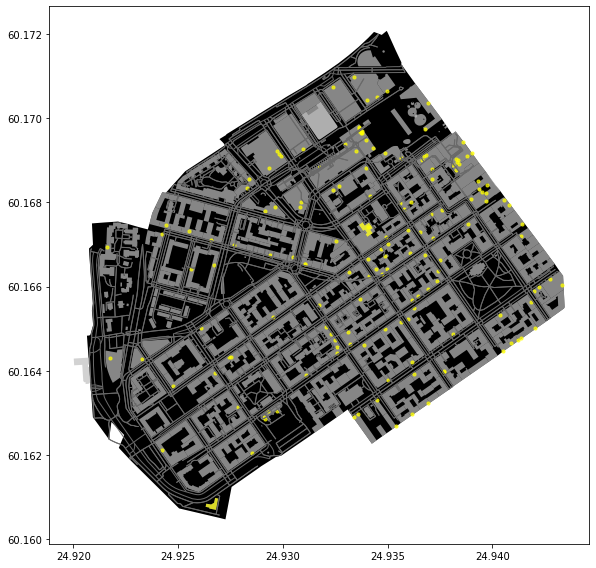

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

In [ ]:
my_place = "Kyiv, Ukraine"

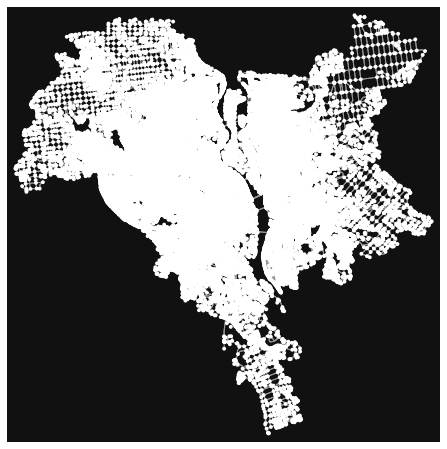

In [ ]:
# Get street network

street = ox.graph_from_place(my_place)
fig, ax = ox.plot_graph(street)

In [ ]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(street)

nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
10980673,50.434732,30.504973,3,NaN,NaN,POINT (30.50497 50.43473)
10980674,50.434553,30.505814,4,traffic_signals,NaN,POINT (30.50581 50.43455)
10980679,50.435946,30.518427,4,traffic_signals,NaN,POINT (30.51843 50.43595)
10980707,50.447087,30.536553,3,traffic_signals,NaN,POINT (30.53655 50.44709)
10980710,50.445308,30.539823,3,traffic_signals,NaN,POINT (30.53982 50.44531)


<AxesSubplot:>

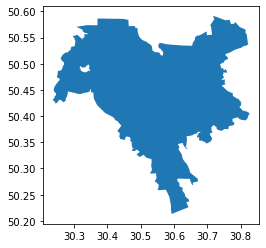

In [ ]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(my_place)
area.plot()

In [ ]:
# Get building footprints

tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

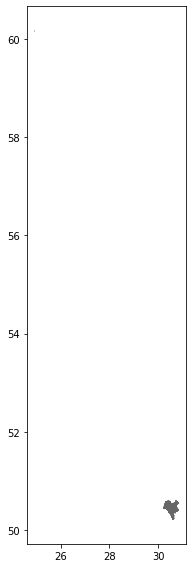

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
#restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

In [ ]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}

In [ ]:
# Get the data
parks = ox.geometries_from_place(place_name, tags)

# Check the result
print("Retrieved", len(parks), "objects")

Retrieved 53 objects


In [ ]:
parks.head(3)

,unique_id,osmid,element_type,geometry,access,source,addr:city,nodes,leisure,name,name:fi,name:sv,hoitoluokitus_viheralue,wikidata,wikipedia,landuse,alt_name,loc_name
0,way/8042256,8042256,way,"POLYGON ((24.93566 60.17132, 24.93566 60.17130...",NaN,NaN,NaN,"[292719496, 1001543836, 1037987967, 1001544060...",park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/8042613,8042613,way,"POLYGON ((24.93701 60.16947, 24.93627 60.16919...",NaN,NaN,NaN,"[552965718, 293390264, 295056669, 256264975, 1...",park,Simonpuistikko,Simonpuistikko,Simonsskvären,NaN,NaN,NaN,NaN,NaN,NaN
2,way/15218362,15218362,way,"POLYGON ((24.92330 60.16499, 24.92323 60.16500...",NaN,survey,NaN,"[144181223, 150532964, 150532958, 150532966, 1...",park,Työmiehenpuistikko,Työmiehenpuistikko,Arbetarparken,A2,NaN,NaN,NaN,NaN,NaN


In [ ]:
parks.columns.values

array(['unique_id', 'osmid', 'element_type', 'geometry', 'access',
       'source', 'addr:city', 'nodes', 'leisure', 'name', 'name:fi',
       'name:sv', 'hoitoluokitus_viheralue', 'wikidata', 'wikipedia',
       'landuse', 'alt_name', 'loc_name'], dtype=object)

<AxesSubplot:>

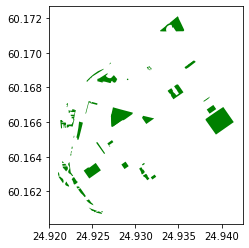

In [ ]:
parks.plot(color="green")

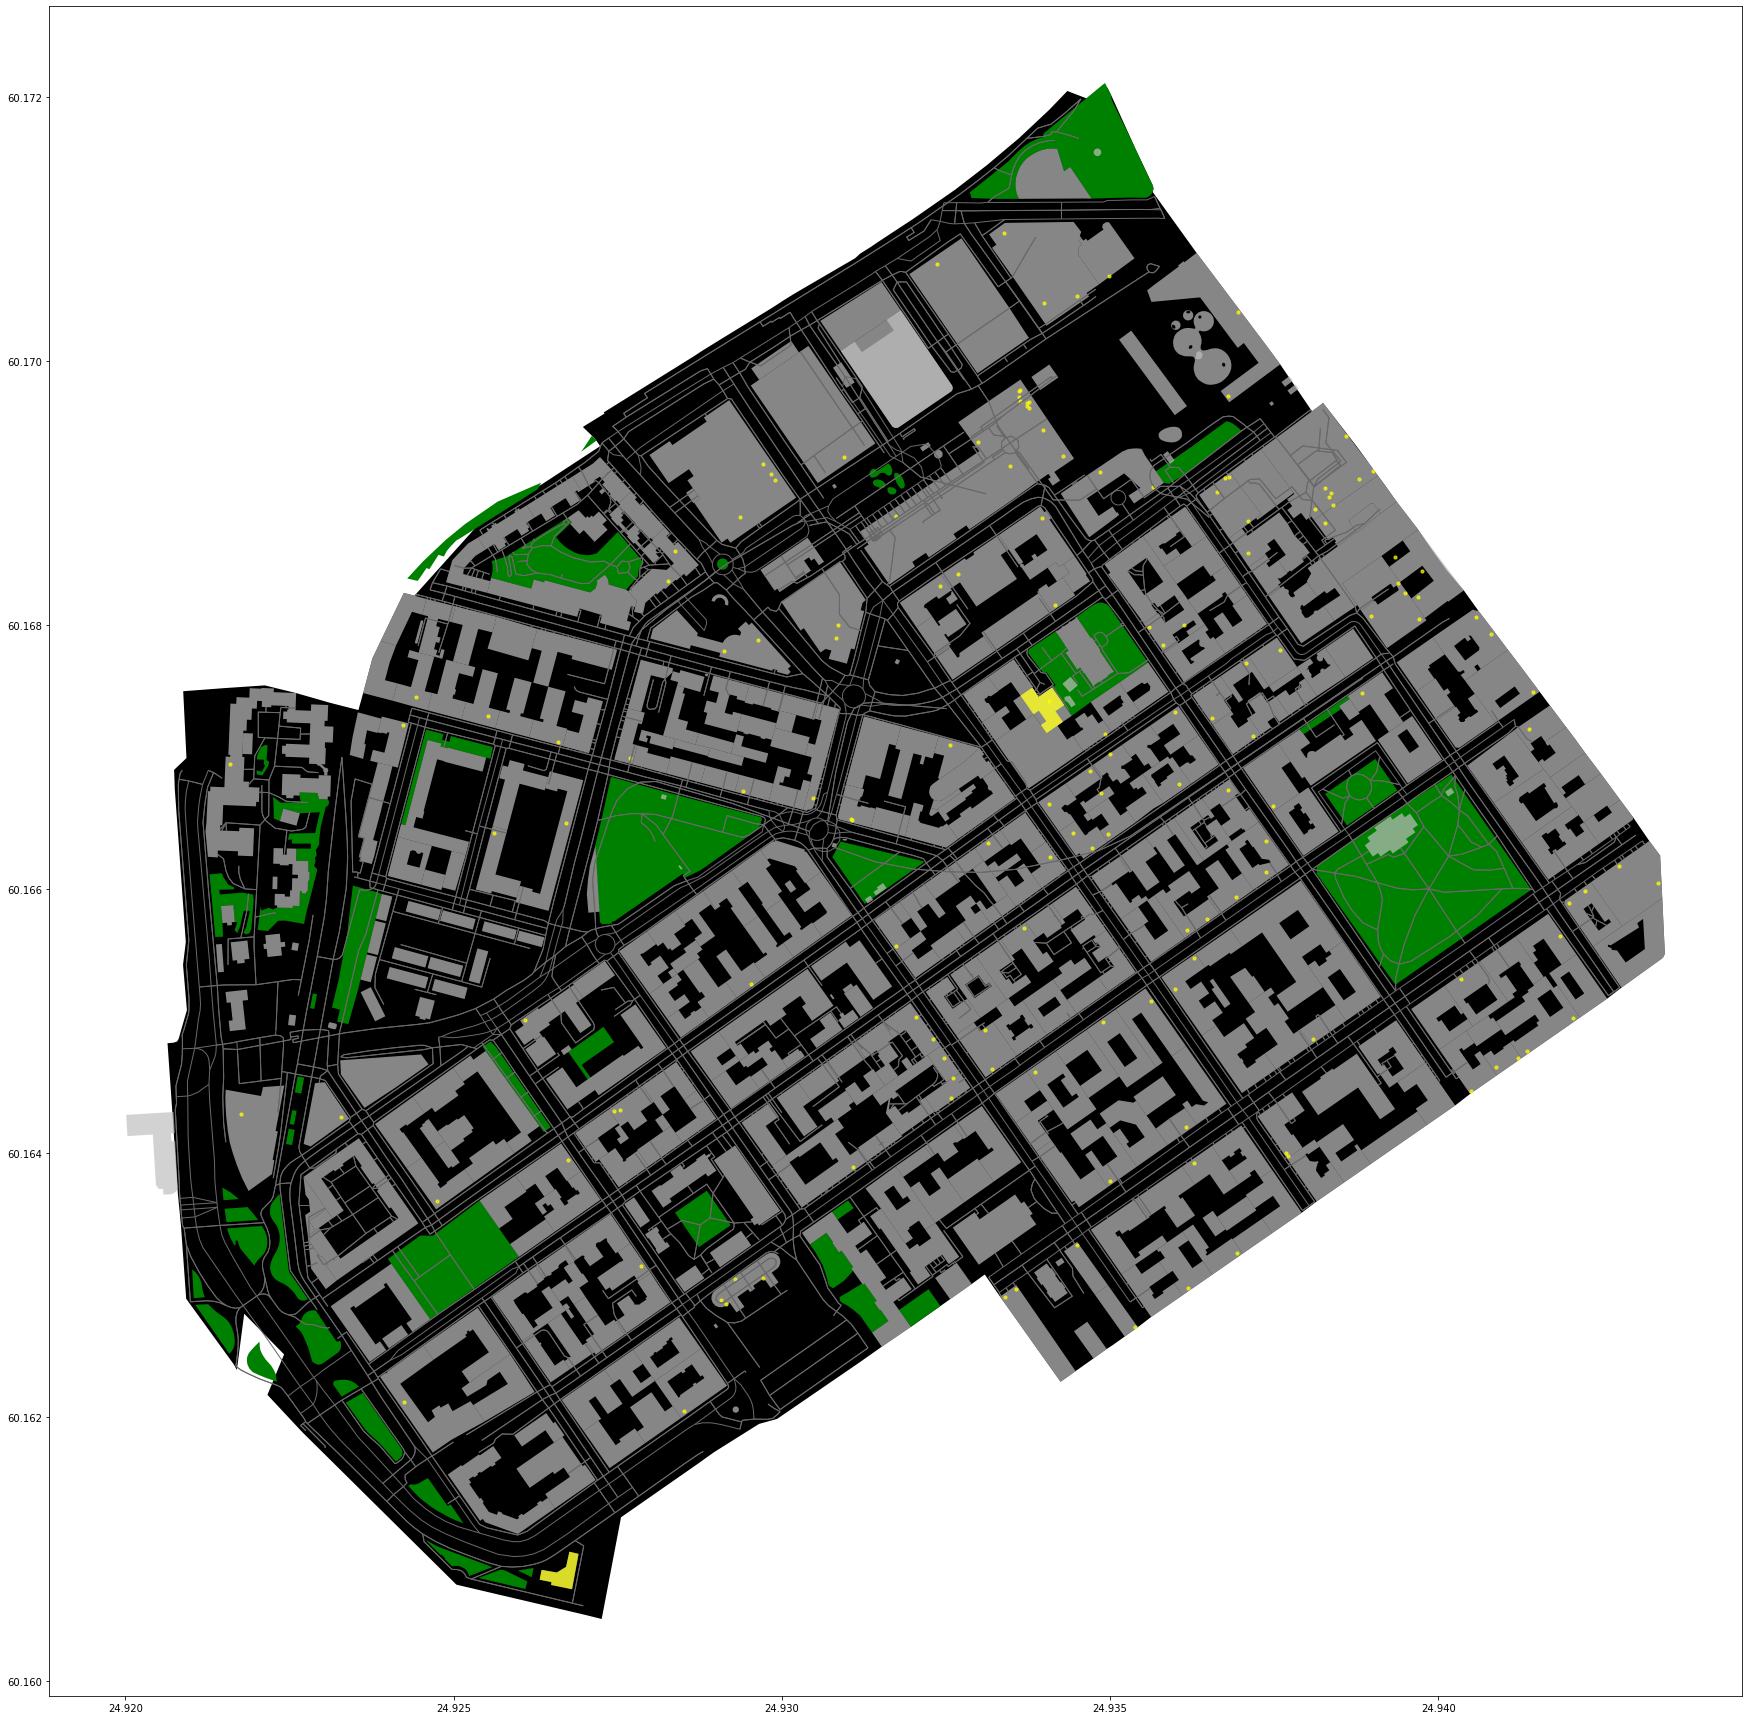

In [ ]:
fig, ax = plt.subplots(figsize=(36,24))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()